# Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

In [0]:
sns.set()

# Plotting sigmoid function

$S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [0]:
def sigmoid(X,w,b):

  return 1/(1+np.exp(-((w*X)+b)))

In [44]:
sigmoid(1,0.5,0)

0.6224593312018546

In [0]:
w = -0.5 #@param{type:"slider", min:-2,max:2,step:0.1}
b = 0.1 #@param{type:"slider", min:-2,max:2,step:0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

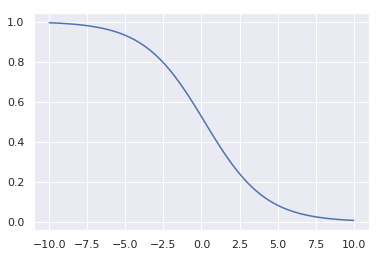

In [46]:
plt.plot(X,Y)
plt.show()

# Plotting 3d Sigmoid


In [0]:
from mpl_toolkits import mplot3d

In [0]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,50)

xx1, xx2 = np.meshgrid(x1,x2)

In [0]:
np.meshgrid?

In [50]:
xx1.shape

(50, 100)

In [51]:
xx2.shape

(50, 100)

In [0]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

xx1, xx2 = np.meshgrid(x1,x2)

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [54]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
w1 = 0.5
w2 = 0.5
b = 0

In [0]:
y = sigmoid_2d(xx1,xx2,w1,w2,b)

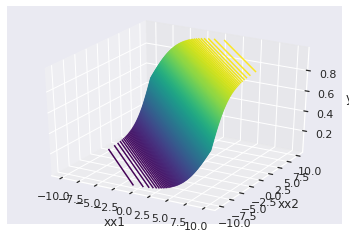

In [57]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xx1, xx2, y, 200, cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

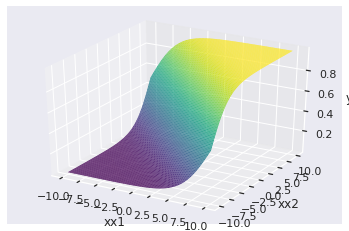

In [58]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx1, xx2, y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

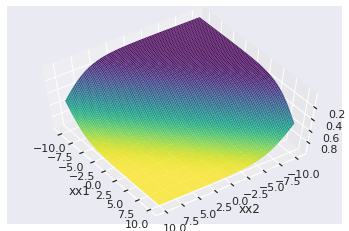

In [59]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx1, xx2, y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

ax.view_init(300,35)

In [0]:
ax.view_init?

# Plotting Loss

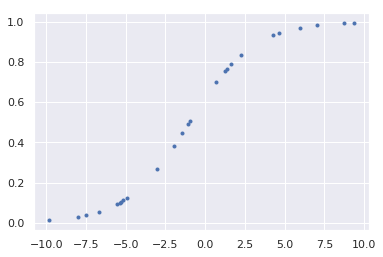

In [61]:
w_unknown = 0.5
b_unknown = 0.5

X = np.random.random(25)*20-10
Y = sigmoid(X,w_unknown, b_unknown)

plt.plot(X,Y,'.')
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(x,w_est,b_est))**2
  return loss

In [0]:
w = np.linspace(0,2,100)
b = np.linspace(-1,1,100)

ww,bb = np.meshgrid(w,b)
loss = np.zeros(ww.shape)

In [0]:
for i in range(ww.shape[0]):
  for j in range(ww.shape[1]):
    loss[i,j] = calculate_loss(X,Y,ww[i,j],bb[i,j])

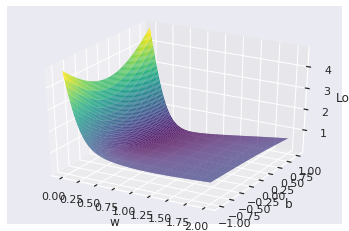

In [65]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, loss, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

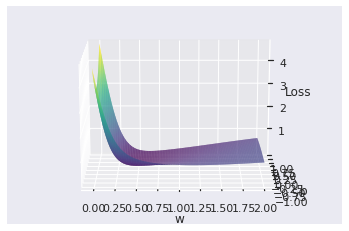

In [66]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, loss, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.plot_surface(xx1, xx2, y,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(15,270)

In [67]:
ij = np.argmin(loss)
print(ij)

i = int(np.floor(ij/loss.shape[1]))
j = int(ij - i*loss.shape[1])

i,j

7425


(74, 25)

In [68]:
ww[i,j],bb[i,j]

(0.5050505050505051, 0.49494949494949503)

# Contour plot

In [0]:
import matplotlib.colors

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","violet","blue"])

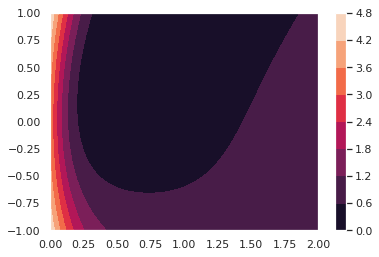

In [71]:
plt.contourf(ww,bb,loss)
plt.colorbar()
plt.show()

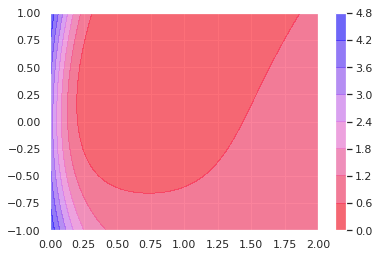

In [72]:
plt.contourf(ww,bb,loss,cmap=my_cmap,alpha=0.6)
plt.colorbar()
plt.show()

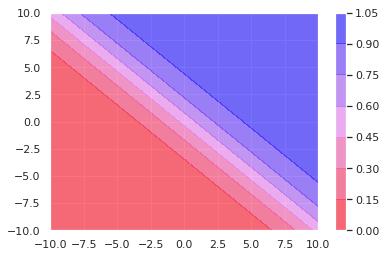

In [73]:
plt.contourf(xx1,xx2,y,cmap=my_cmap,alpha=0.6)
plt.colorbar()
plt.show()

# Sigmoid Class

In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-(self.perceptron(x))))

  def grad_w(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred-y)*(y_pred)*(1-y_pred)*x
  
  def grad_b(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred-y)*(y_pred)*(1-y_pred)

  def fit(self,X,Y,epochs = 1,learning_rate = 1, initialise = True):
    self.w = np.random.randn(1, X.shape[1])
    self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw-=self.grad_w(x,y)
        db-=self.grad_b(x,y)
      
      self.w = learning_rate*dw
      self.b = learning_rate*db


# Fitting for Toy Data

In [0]:
sn = SigmoidNeuron()
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
Y = np.asarray([1,1,1,0,0,0])

sn.fit(X,Y)

In [76]:
print(sn.w,sn.b)

[0.58993154 0.0219782 ] [0.17974533]


In [141]:
#Running a loop for fitting the model on the toy data using single loop statements

for i in range(100):
  if i==0:
    sn.fit(X,Y,1,0.1,True)
  else:
    sn.fit(X,Y,1,0.1,False)
  print(sn.w,sn.b)

[ 0.01057641 -0.00899866] [0.00472057]
[0.0145431  0.00424883] [0.00455652]
[ 1.65515688e-05 -1.80072303e-03] [0.00018486]
[ 0.04501893 -0.12096447] [0.01437113]
[0.03604122 0.00077451] [0.01019108]
[-0.00770341 -0.03801898] [-0.00508549]
[ 0.01278725 -0.00266025] [0.00330043]
[-0.04780281 -0.09080667] [-0.02377511]
[-0.01246966  0.00228371] [-0.00330381]
[ 0.00504846 -0.0299456 ] [-0.0018624]
[-0.00212261  0.01099633] [0.0006413]
[ 0.02076256 -0.01677822] [0.00937245]
[-0.03858062 -0.01809135] [-0.01308789]
[-0.00149926 -0.03009976] [0.00228083]
[-0.00321862 -0.19502592] [-0.00797626]
[-0.00728529 -0.06305487] [-0.00894097]
[ 0.02370129 -0.01258849] [0.00509987]
[0.01999413 0.0120561 ] [0.00736067]
[ 0.04292513 -0.16500215] [0.00856156]
[-0.0241192  -0.02728184] [-0.00982605]
[ 0.05879054 -0.00111651] [0.01651749]
[-0.02193066 -0.03261039] [-0.00979391]
[-0.00257658 -0.01264053] [-0.0017215]
[-0.00608043 -0.00191222] [-0.0019224]
[-0.03980815 -0.19368188] [-0.01921809]
[-0.01271039 -0

In [0]:
x1_toplot = np.linspace(0,5,100)
x2_toplot = np.linspace(-6,6,100)

xx1_toplot,xx2_toplot = np.meshgrid(x1_toplot,x2_toplot)
y_toplot = sigmoid_2d(xx1_toplot,xx2_toplot,sn.w[0],sn.w[1],sn.b)

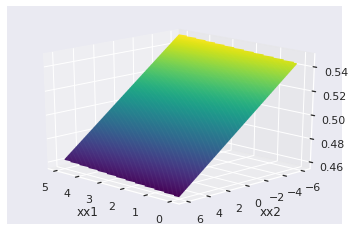

In [143]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xx1_toplot, xx2_toplot, y_toplot, 200, cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

ax.view_init(20,135)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [0]:
a = X[:,0]
b = X[:,1]
labels_toplot = Y
colors = ['black','white']

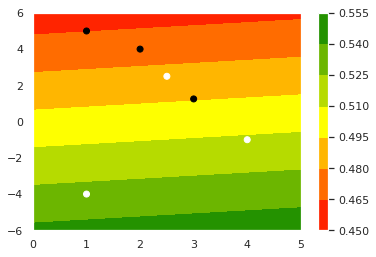

In [146]:
plt.contourf(xx1_toplot,xx2_toplot,y_toplot,cmap=my_cmap)
plt.colorbar()
plt.scatter(a,b,c=labels_toplot, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()